In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
all_datasets = ['mc', 'tf', 'mnn', 'sys', 'stress', '7zip', 'cp2k', 'crypto', 'gzip', 'stream', 'fio', 'leveldb', 'mbw', 'ramspeedsmp', 'tinymemb', 'idle']
df_all = {}
for i in all_datasets:
    df_all[i] = pd.read_csv("datasets/final-" + i + ".csv")
# df1 = pd.read_csv("datasets/final-mc.csv")
# df2 = pd.read_csv("datasets/final-tf.csv")
# df3 = pd.read_csv("datasets/final-mnn.csv")
# df4 = pd.read_csv("datasets/final-sys.csv")
# df5 = pd.read_csv("datasets/final-stress.csv")
# df1 = df1.loc[:, ~df1.columns.str.contains('^Unnamed')]
# df2 = df2.loc[:, ~df2.columns.str.contains('^Unnamed')]
# df3 = df3.loc[:, ~df3.columns.str.contains('^Unnamed')]
# df4 = df4.loc[:, ~df4.columns.str.contains('^Unnamed')]
# df5 = df5.loc[:, ~df5.columns.str.contains('^Unnamed')]
for test in df_all:
    df_all[test] = df_all[test].loc[:, ~df_all[test].columns.str.contains('^Unnamed')]

In [41]:
trainset = ['mc', 'tf', 'mnn', 'sys', 'stress', '7zip', 'cp2k', 'crypto', 'gzip', 'stream', 'fio', 'leveldb', 'mbw', 'ramspeedsmp', 'tinymemb', 'idle']
# trainset = ['stress', '7zip', 'cp2k', 'crypto', 'gzip']
testset = ['sys']
df_train = pd.DataFrame()
# df_train = df_all[trainset[0]]
# print(trainset[0], "included in training set")
for t in trainset:
    if t in testset:
        continue
    df_train = df_train.append(df_all[t], ignore_index=True)
    print(t, "included in training set")

df_test = pd.DataFrame()
for t in testset:
    df_test = df_test.append(df_all[t], ignore_index=True)
    print(t, "included in testing set")

mc included in training set
tf included in training set
mnn included in training set
stress included in training set
7zip included in training set
cp2k included in training set
crypto included in training set
gzip included in training set
stream included in training set
fio included in training set
leveldb included in training set
mbw included in training set
ramspeedsmp included in training set
tinymemb included in training set
idle included in training set
sys included in testing set


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_41904/3000634834.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_41904/3000634834.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)


LinearRegression()
Model coefficients: [[-1.10816584e-05 -5.82102752e-10  3.79057390e-06 -4.29352640e-09
   1.28038727e-05  8.32709754e-09 -4.20907563e-09 -1.38793078e-06
  -1.39718837e-12  1.54247395e+00  1.21820445e+00]]
Model intercept: [60.30250633]
Mean absolute error: 1847.2
Mean absolute percentage error: 1414.88
Standard deviation of test set: 4.54


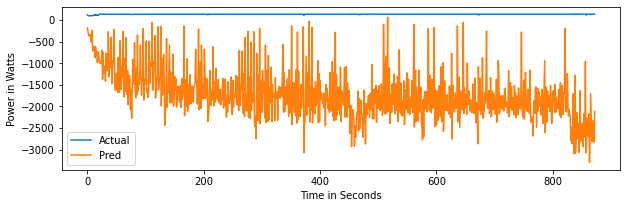

/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()
Mean absolute error: 4.81
Mean absolute percentage error: 3.8
Standard deviation of test set: 4.54


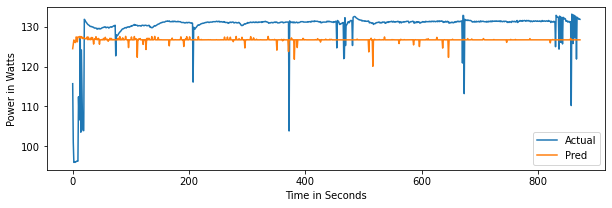

DecisionTreeRegressor()
Mean absolute error: 6.76
Mean absolute percentage error: 5.23
Standard deviation of test set: 4.54


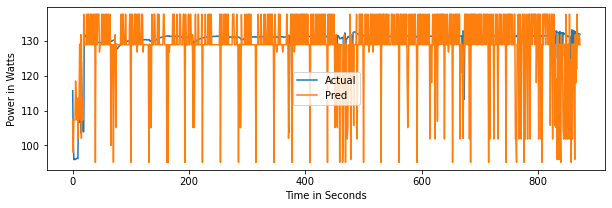

/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_41904/135787729.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X1, y1)


RandomForestRegressor()
Mean absolute error: 13.43
Mean absolute percentage error: 10.34
Standard deviation of test set: 4.54


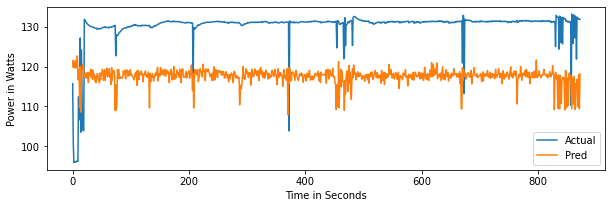

In [42]:
X1 = df_train.iloc[:, :-1].values
y1 = df_train.iloc[:, -1:].values

X2 = df_test.iloc[:, :-1].values
y2 = df_test.iloc[:, -1:].values

std = df_test.std().power

# Split the data into training and testing sets
# X = df_train.iloc[:, :-1].values
# y = df_train.iloc[:, -1:].values
# X1, X2, y1, y2 = train_test_split(X, y, test_size=0.25, random_state=42)
# std = np.std(y2)

# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


# Create a linear regression model
model = LinearRegression(fit_intercept=True)
model.fit(X1, y1)
y_pred = model.predict(X2)
mae = mean_absolute_error(y2, y_pred)
mape = mean_absolute_percentage_error(y2, y_pred)
# std = df_test.std().power
print(model)
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)
print("Mean absolute error:", round(mae, 2))
print("Mean absolute percentage error:", round((mape*100), 2))
print("Standard deviation of test set:", round(std, 2))
df_plot = pd.DataFrame({'Actual': y2.flatten(), 'Pred': y_pred.flatten()})
plt.figure(figsize=(10, 3))
plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
# plt.ylim(y)
plt.show()

# Create a Support Vector Regressor model
model = SVR()
model.fit(X1, y1)
y_pred = model.predict(X2)
mae = mean_absolute_error(y2, y_pred)
mape = mean_absolute_percentage_error(y2, y_pred)
# std = df_test.std().power
print(model)
print("Mean absolute error:", round(mae, 2))
print("Mean absolute percentage error:", round((mape*100), 2))
print("Standard deviation of test set:", round(std, 2))
df_plot = pd.DataFrame({'Actual': y2.flatten(), 'Pred': y_pred})
plt.figure(figsize=(10, 3))
plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
# plt.ylim(y)
plt.show()

# Create a decision tree regression model
model = DecisionTreeRegressor()
model.fit(X1, y1)
y_pred = model.predict(X2)
mae = mean_absolute_error(y2, y_pred)
mape = mean_absolute_percentage_error(y2, y_pred)
# std = df_test.std().power
print(model)
print("Mean absolute error:", round(mae, 2))
print("Mean absolute percentage error:", round((mape*100), 2))
print("Standard deviation of test set:", round(std, 2))
df_plot = pd.DataFrame({'Actual': y2.flatten(), 'Pred': y_pred})
plt.figure(figsize=(10, 3))
plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
# plt.ylim(y)
plt.show()

# Create a random forst regression model
model = RandomForestRegressor()
model.fit(X1, y1)
y_pred = model.predict(X2)
mae = mean_absolute_error(y2, y_pred)
mape = mean_absolute_percentage_error(y2, y_pred)
# std = df_test.std().power
print(model)
print("Mean absolute error:", round(mae, 2))
print("Mean absolute percentage error:", round((mape*100), 2))
print("Standard deviation of test set:", round(std, 2))
df_plot = pd.DataFrame({'Actual': y2.flatten(), 'Pred': y_pred})
plt.figure(figsize=(10, 3))
plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
# plt.ylim(y)
plt.show()

LinearRegression()
Model coefficients: [[-4.91378337e-05 -7.43614209e-09  3.43794304e-05 -1.92299771e-08
   2.76295186e-05 -5.19465965e-08  2.86879726e-08  2.22946665e-06
  -1.45237151e-11]]
Model intercept: [128.35663922]
Mean absolute error: 3178.8
Mean absolute percentage error: 2435.47
Standard deviation of test set: 4.54


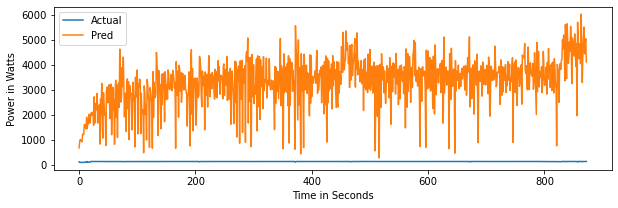

/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()
Mean absolute error: 4.76
Mean absolute percentage error: 3.76
Standard deviation of test set: 4.54


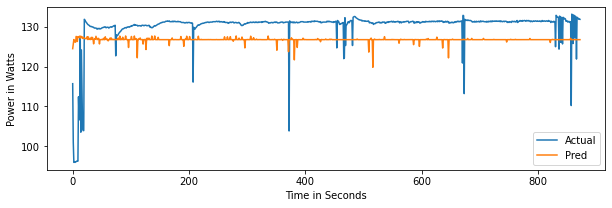

DecisionTreeRegressor()
Mean absolute error: 28.72
Mean absolute percentage error: 22.0
Standard deviation of test set: 4.54


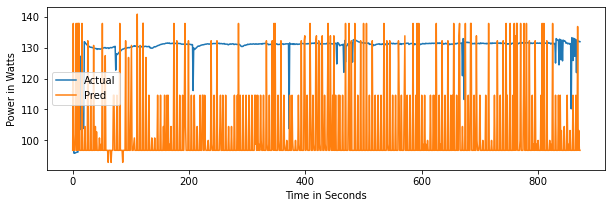

/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_41904/2459101358.py:87: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X1, y1)


RandomForestRegressor()
Mean absolute error: 20.04
Mean absolute percentage error: 15.35
Standard deviation of test set: 4.54


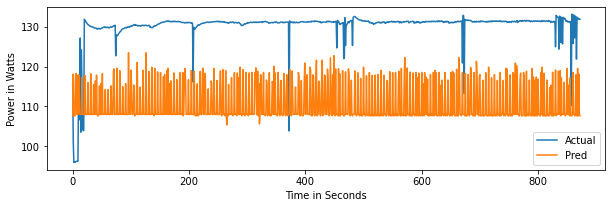

In [43]:
X1 = df_train.iloc[:, :-3].values
y1 = df_train.iloc[:, -1:].values

X2 = df_test.iloc[:, :-3].values
y2 = df_test.iloc[:, -1:].values

std = df_test.std().power

# Split the data into training and testing sets
# X = df_train.iloc[:, :-3].values
# y = df_train.iloc[:, -1:].values
# X1, X2, y1, y2 = train_test_split(X, y, test_size=0.25, random_state=42)
# std = np.std(y2)

# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


# Create a linear regression model
model = LinearRegression(fit_intercept=True)
model.fit(X1, y1)
y_pred = model.predict(X2)
mae = mean_absolute_error(y2, y_pred)
mape = mean_absolute_percentage_error(y2, y_pred)
# std = df_test.std().power
print(model)
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)
print("Mean absolute error:", round(mae, 2))
print("Mean absolute percentage error:", round((mape*100), 2))
print("Standard deviation of test set:", round(std, 2))
df_plot = pd.DataFrame({'Actual': y2.flatten(), 'Pred': y_pred.flatten()})
plt.figure(figsize=(10, 3))
plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
# plt.ylim(y)
plt.show()

# Create a Support Vector Regressor model
model = SVR()
model.fit(X1, y1)
y_pred = model.predict(X2)
mae = mean_absolute_error(y2, y_pred)
mape = mean_absolute_percentage_error(y2, y_pred)
# std = df_test.std().power
print(model)
# print("Model coefficients:", model.coef_)
print("Mean absolute error:", round(mae, 2))
print("Mean absolute percentage error:", round((mape*100), 2))
print("Standard deviation of test set:", round(std, 2))
df_plot = pd.DataFrame({'Actual': y2.flatten(), 'Pred': y_pred})
plt.figure(figsize=(10, 3))
plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
# plt.ylim(y)
plt.show()

# Create a decision tree regression model
model = DecisionTreeRegressor()
model.fit(X1, y1)
y_pred = model.predict(X2)
mae = mean_absolute_error(y2, y_pred)
mape = mean_absolute_percentage_error(y2, y_pred)
# std = df_test.std().power
print(model)
print("Mean absolute error:", round(mae, 2))
print("Mean absolute percentage error:", round((mape*100), 2))
print("Standard deviation of test set:", round(std, 2))
df_plot = pd.DataFrame({'Actual': y2.flatten(), 'Pred': y_pred})
plt.figure(figsize=(10, 3))
plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
# plt.ylim(y)
plt.show()

# Create a random forst regression model
model = RandomForestRegressor()
model.fit(X1, y1)
y_pred = model.predict(X2)
mae = mean_absolute_error(y2, y_pred)
mape = mean_absolute_percentage_error(y2, y_pred)
# std = df_test.std().power
print(model)
print("Mean absolute error:", round(mae, 2))
print("Mean absolute percentage error:", round((mape*100), 2))
print("Standard deviation of test set:", round(std, 2))
df_plot = pd.DataFrame({'Actual': y2.flatten(), 'Pred': y_pred})
plt.figure(figsize=(10, 3))
plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
# plt.ylim(y)
plt.show()

LinearRegression()
Model coefficients: [[-4.91378337e-05 -7.43614209e-09  3.43794304e-05 -1.92299771e-08
   2.76295186e-05 -5.19465965e-08  2.86879726e-08  2.22946665e-06
  -1.45237151e-11]]
Model intercept: [128.35663922]
Mean absolute error: 3178.8
Mean absolute percentage error: 2435.47
Standard deviation of test set: 4.54


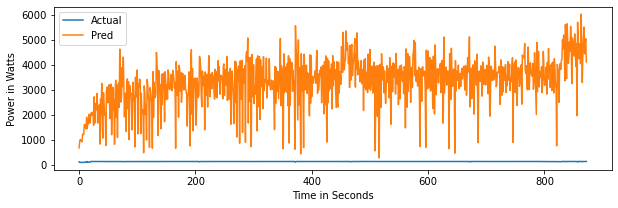

171574.0
2122942564.0
20754432.0
40536.0
3061588.0
270992.0
1681547785.0
1642878135.0
[[-4.91378337e-05 -7.43614209e-09  3.43794304e-05 -1.92299771e-08
   2.76295186e-05 -5.19465965e-08  2.86879726e-08  2.22946665e-06
  -1.45237151e-11]]


Index(['LLC-stores', 'instructions', 'bytes', 'blocks', 'LLC-loads',
       'LLC-load-misses', 'ref-cycles', 'cycles', 'LLC-store-misses',
       'pkg_pwr', 'ram_pwr', 'power'],
      dtype='object')

In [63]:
# Create a linear regression model
model = LinearRegression(fit_intercept=True)
model.fit(X1, y1)
y_pred = model.predict(X2)
mae = mean_absolute_error(y2, y_pred)
mape = mean_absolute_percentage_error(y2, y_pred)
# std = df_test.std().power
print(model)
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)
print("Mean absolute error:", round(mae, 2))
print("Mean absolute percentage error:", round((mape*100), 2))
print("Standard deviation of test set:", round(std, 2))
df_plot = pd.DataFrame({'Actual': y2.flatten(), 'Pred': y_pred.flatten()})
plt.figure(figsize=(10, 3))
plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
# plt.ylim(y)
plt.show()
df3 = df_test.iloc[500]
df4 = df3.drop('power')
for i in range(len(df4)-3):
    print(df4[i])
print(model.coef_)
df_test.columns

Mean absolute error: 1.9000450167272946
Mean absolute percentage error: 0.014632770626331415
Standard deviation of test set: 5.401341233103098


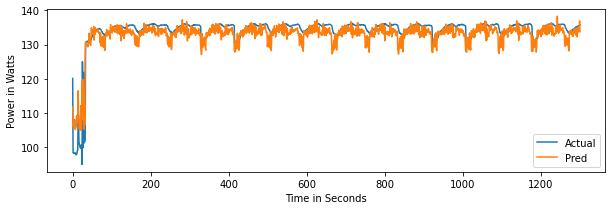

In [39]:
# Use the model to make predictions on the test data
y_pred = model.predict(X2)

# Import necessary module
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# Calculate the mean absolute error
mae = mean_absolute_error(y2, y_pred)

# Calculate the mean absolute percentage error
mape = mean_absolute_percentage_error(y2, y_pred)

# std dev of test set
std = df_test.std().power

# Print the mean absolute error
print("Mean absolute error:", mae)

# Print the mean absolute percentage error
print("Mean absolute percentage error:", mape)

# Print the std dev of test set
print("Standard deviation of test set:", std)

df_plot = pd.DataFrame({'Actual': y2.flatten(), 'Pred': y_pred.flatten()})

plt.figure(figsize=(10, 3))

plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
# plt.ylim(y)
plt.show()

In [38]:
y_pred

array([[111.82953629],
       [106.0922629 ],
       [107.13649235],
       ...,
       [134.63427017],
       [136.91358455],
       [133.71318169]])

In [91]:
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

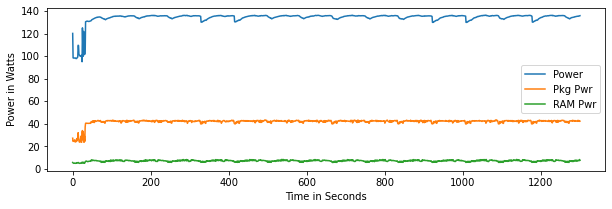

In [22]:
df5 = pd.DataFrame({'Power': df2['power'], 'Pkg Pwr': df2['pkg_pwr'], 'RAM Pwr': df2['ram_pwr']})

plt.figure(figsize=(10, 3))

plt.plot(df5)
plt.legend(df5.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
# plt.ylim(y)
plt.show()

In [66]:
df6 = pd.read_csv("datasets/final-" + "mc" + ".csv")
# df.to_csv("final-" + "mc" + ".csv")

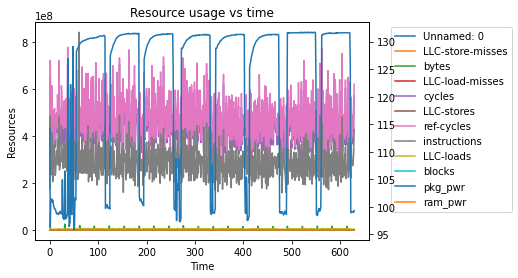

In [70]:
# Create a figure and axes object
fig, ax = plt.subplots()

# Creating logarithmic data to view plot properly
# df_log = df6.apply(lambda x: np.log(x))
df_log = df6


# Loop through each column in the dataframe
for column in df_log.columns:
    # Plot the data in the column
    if column == 'power':
        continue
    ax.plot(df_log.index, df_log[column])

# Adjust the position of the legend
ax.legend(df_log.columns, bbox_to_anchor=(1.05, 1), loc="upper left")

ax2 = ax.twinx()

ax2.plot(df_log.index, df6['power'])


# Add labels and title
ax.set_xlabel("Time")
ax.set_ylabel("Resources")
ax.set_title("Resource usage vs time")

# Show the plot
plt.show()

In [7]:
df_train

,LLC-stores,instructions,bytes,blocks,LLC-loads,LLC-load-misses,ref-cycles,cycles,LLC-store-misses,pkg_pwr,ram_pwr,power


In [15]:
df1.append(df2, ignore_index=True)

/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_45585/2149412069.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(df2, ignore_index=True)


,LLC-store-misses,bytes,LLC-load-misses,cycles,LLC-stores,ref-cycles,instructions,LLC-loads,blocks,pkg_pwr,ram_pwr,power
0,201,0,33704,246614987,77401,309954960,175424036,1888885,0,25.26,5.60,114.3
1,3991,1515520,128573,645701155,237071,721242788,484898464,4829064,2960,26.85,5.27,96.2
2,3532,0,16717,484180633,203951,521848389,352055320,3690342,0,27.13,5.25,101.3
3,272,0,6324,350631132,134689,400430646,234899560,2539655,0,24.13,5.14,101.4
4,5967,0,119758,568901090,239828,613966456,412955333,4113659,0,27.33,5.31,101.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1926,14884,0,185387,406172924,159291,415998088,296721283,3161893,0,42.31,7.28,135.5
1927,12572,253952,147802,338846014,137870,346459418,237696239,2584354,496,42.79,7.49,135.4
1928,7783,0,265177,342297157,140224,371065438,258648307,2796785,0,42.50,7.48,135.5
1929,13273,0,208184,400942722,159829,455830375,356681202,3189821,0,42.80,8.34,135.5


In [20]:
df_test.std().power

9.644476324879214

In [28]:
y1

array([[120.1],
       [ 98.4],
       [ 98.4],
       ...,
       [131.9],
       [132. ],
       [131.9]])

In [12]:
df_all['sys']

,LLC-stores,instructions,bytes,blocks,LLC-loads,LLC-load-misses,ref-cycles,cycles,LLC-store-misses,pkg_pwr,ram_pwr,power
0,55971,244263294,0,0,1578665,169887,345748800,223665294,5693,25.45,5.70,115.7
1,82608,308257946,1773568,3464,1709834,67969,407119397,296340673,6401,23.02,5.48,101.0
2,94155,416873966,0,0,2603688,208237,513197446,359854090,16121,23.78,5.65,95.9
3,76137,362000069,0,0,1956045,74650,447720027,352794635,11980,22.71,5.50,96.1
4,87339,347759497,0,0,2135048,203354,445654259,340949802,18769,23.17,5.72,95.9
...,...,...,...,...,...,...,...,...,...,...,...,...
868,364034,2817778936,23207936,45328,5120357,347431,2119174675,1985314445,20196,38.20,6.98,132.3
869,1005386,2453356213,0,0,8341898,1995664,1865655258,1837472502,867071,40.21,6.75,132.1
870,220265,2753276969,540672,1056,3503709,357529,2147145613,2041003199,26728,40.24,6.74,131.9
871,262208,2818788965,0,0,3376281,379933,2167132676,2148206141,28341,34.99,6.76,132.0


In [7]:
df_train

,LLC-store-misses,bytes,LLC-load-misses,cycles,LLC-stores,ref-cycles,instructions,LLC-loads,blocks,pkg_pwr,ram_pwr,power
0,8109,0,141046,295777423,79051,350080479,234678562,1842096,0,27.24,5.74,120.1
1,3263,1601536,77629,490594913,157779,589109220,396685157,3539554,3128,24.40,5.33,98.4
2,113,0,9613,321155049,119493,407016953,241109645,2713281,0,25.01,5.09,98.4
3,103,0,7814,491581208,199088,550485435,314867377,3656476,0,24.79,4.99,98.2
4,79,0,7115,294607495,110472,346053581,204085053,2326189,0,24.89,5.07,98.2
...,...,...,...,...,...,...,...,...,...,...,...,...
10820,396,339968,2627,318369310,122927,367199783,209988489,2349936,664,23.62,4.99,99.2
10821,686,0,6028,479845177,187387,506210431,317018522,3160544,0,24.59,4.98,98.8
10822,1641,0,529198,458279600,122536,569210372,342152184,5854553,0,26.18,5.75,98.7
10823,5950,253952,122134,481506039,192749,596666264,384411095,3486799,496,24.89,5.17,98.6


In [6]:
df_train.iloc[:, :-3]

,LLC-store-misses,bytes,LLC-load-misses,cycles,LLC-stores,ref-cycles,instructions,LLC-loads,blocks
0,8109,0,141046,295777423,79051,350080479,234678562,1842096,0
1,3263,1601536,77629,490594913,157779,589109220,396685157,3539554,3128
2,113,0,9613,321155049,119493,407016953,241109645,2713281,0
3,103,0,7814,491581208,199088,550485435,314867377,3656476,0
4,79,0,7115,294607495,110472,346053581,204085053,2326189,0
...,...,...,...,...,...,...,...,...,...
10820,396,339968,2627,318369310,122927,367199783,209988489,2349936,664
10821,686,0,6028,479845177,187387,506210431,317018522,3160544,0
10822,1641,0,529198,458279600,122536,569210372,342152184,5854553,0
10823,5950,253952,122134,481506039,192749,596666264,384411095,3486799,496
